## Data Pre-Processing


https://www.kaggle.com/jessevent/all-crypto-currencies

In [46]:
import pandas as pd
import numpy as np
import functools

# Viz. Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn import preprocessing
from sklearn import cross_decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
data = pd.read_csv('./data/crypto-markets.csv')

In [34]:
# Converting the date column into date format
data.date=pd.to_datetime(data.date)

In [35]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


Explaining few attributes
- volume - Transactions volume
- market - Market Cap
- ranknow - Currency rank
- spread - Spread between high and low

In [36]:
# All types of crypto
len(data.symbol.unique())

2005

In [52]:
# Convert date to real date
data['date'] = pd.to_datetime(data['date'])
data['market_billion'] = data['market'] / 1000000000
data['volume_million'] = data['volume'] / 1000000000
data['volume_billion'] = data['volume']

In [53]:
data

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88,1.488567,0.000000e+00,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49,1.603769,0.000000e+00,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88,1.542813,0.000000e+00,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17,1.298955,0.000000e+00,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32,1.168517,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942292,project-x,NANOX,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80,0.000002,1.430000e-07,143.0
942293,project-x,NANOX,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20,0.000002,6.370000e-07,637.0
942294,project-x,NANOX,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00,0.000002,4.900000e-08,49.0
942295,project-x,NANOX,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52,0.000002,1.530000e-07,153.0


In [62]:
wide_format = data.groupby(['date', 'name'])['close'].last().unstack()

In [63]:
wide_format.head()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
wide_format.shape

(2043, 2071)

In [67]:
wide_format.describe()

name,0chain,0x,0xBitcoin,0xcert,1World,2GIVE,300 Token,42-coin,4NEW,808Coin,...,imbrex,indaHash,nDEX,nUSD,savedroid,smARTOFGIVING,ugChain,vSlice,vSportCoin,wys Token
count,151.000000,471.000000,179.000000,141.000000,254.000000,928.000000,479.000000,1767.000000,100.000000,8.570000e+02,...,419.000000,310.000000,52.000000,140.000000,109.000000,70.000000,321.000000,704.000000,79.000000,128.000000
mean,0.226043,0.755702,0.752177,0.011381,0.157538,0.004351,431.592610,16060.952332,0.038936,3.809788e-04,...,0.360473,0.045366,0.000025,0.993826,0.000855,0.104977,0.037280,0.229741,0.003067,0.021298
std,0.127666,0.456668,0.584787,0.009870,0.069175,0.005247,248.351083,46399.765311,0.017472,6.091416e-04,...,0.403260,0.069530,0.000010,0.007638,0.000292,0.017982,0.035255,0.288677,0.000743,0.013511
min,0.077287,0.170806,0.271742,0.001886,0.057250,0.000098,112.650000,20.720000,0.018916,2.200000e-07,...,0.047550,0.003004,0.000010,0.956075,0.000365,0.048180,0.002447,0.002028,0.001306,0.004697
25%,0.142757,0.366899,0.428322,0.004956,0.102088,0.000407,216.820000,500.080000,0.025860,3.800000e-05,...,0.138685,0.007147,0.000017,0.990096,0.000698,0.097861,0.009387,0.056776,0.002909,0.010187
50%,0.187000,0.706612,0.558985,0.007750,0.145004,0.003415,380.050000,1648.150000,0.036045,1.470000e-04,...,0.225433,0.015522,0.000025,0.994899,0.000808,0.109565,0.029804,0.104084,0.003079,0.018399
75%,0.263088,0.993217,0.874518,0.011754,0.200193,0.005782,576.615000,19514.850000,0.042046,3.900000e-04,...,0.395246,0.054893,0.000032,0.999413,0.000942,0.119500,0.048961,0.243430,0.003708,0.027934
max,0.619802,2.370000,4.330000,0.039857,0.443498,0.039473,1461.650000,793273.000000,0.112169,4.877000e-03,...,3.210000,0.614736,0.000044,1.010000,0.001890,0.127035,0.178324,1.170000,0.004275,0.060287


## Data Exploration

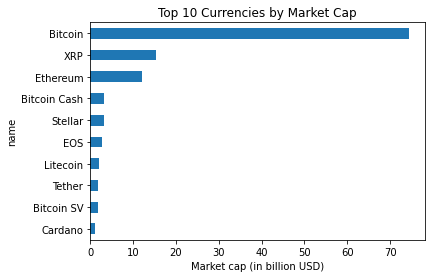

In [82]:
ax = data.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

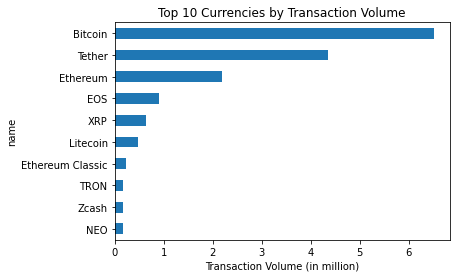

In [83]:
ax = data.groupby(['name'])['volume_million'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh');
ax.set_xlabel("Transaction Volume (in million)");
plt.title("Top 10 Currencies by Transaction Volume");

In [94]:
# For sake of convenience, let's define the top 5 currencies

top_5_currency_names = data.groupby(['name'])['market'].last().head(10).sort_values(ascending=False).head(5).index
data_top_5_currencies = data[data['name'].isin(top_5_currency_names)]

In [99]:
# Got all top coins interms of coin name
data_top_5_currencies.symbol.unique()

array(['ZRX', 'ZCN', '1WO', '0XBTC', 'KWATT'], dtype=object)

In [101]:
data_top_5_currencies.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_million,volume_billion
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1.155000e+03,1.155000e+03,1155.000000,1155.000000,1155.000000,1.155000e+03,1.155000e+03
mean,390.994805,0.493646,0.535412,0.450870,0.492308,6.435083e+06,1.629934e+08,0.474769,0.084537,0.162993,6.435083e-03,6.435083e+06
std,314.771304,0.481093,0.530098,0.426795,0.481067,1.386422e+07,2.434264e+08,0.304527,0.136950,0.243426,1.386422e-02,1.386422e+07
min,26.000000,0.018913,0.019910,0.016274,0.018916,6.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,6.000000e-09,6.000000e+00
25%,26.000000,0.155942,0.167790,0.140840,0.154606,1.058155e+05,2.136770e+06,0.208450,0.020000,0.002137,1.058155e-04,1.058155e+05
50%,441.000000,0.307518,0.341710,0.268985,0.305877,3.262920e+05,6.160800e+06,0.473700,0.050000,0.006161,3.262920e-04,3.262920e+05
75%,672.000000,0.722664,0.774371,0.680864,0.719593,8.665900e+06,3.098749e+08,0.735150,0.100000,0.309875,8.665900e-03,8.665900e+06
max,757.000000,4.230000,4.570000,3.430000,4.330000,2.089100e+08,1.166002e+09,1.000000,2.140000,1.166002,2.089100e-01,2.089100e+08


Vizualization